In [69]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "syntactic_evaluation/results/Classifier/"

In [121]:
surp_none = pd.read_csv(path + 'surprisals_none.tsv', sep='\t', header=0)
sent_none = pd.read_table("syntactic_evaluation/test_suites/Classifier/cls_none_txt.txt",header=None)
surp_adj = pd.read_csv(path + 'surprisals_adj.tsv', sep='\t', header=0)
sent_adj = pd.read_table("syntactic_evaluation/test_suites/Classifier/cls_adj_txt.txt",header=None)

In [111]:
max(surp_none['sentence_id'])/4

30.0

In [136]:
surp_none

,sentence_id,token_id,token,surprisal
0,1,1,我,6.978171
1,1,2,很,6.768952
2,1,3,喜欢,4.918214
3,1,4,一,5.979936
4,1,5,位,4.502104
...,...,...,...,...
847,120,2,有,5.617175
848,120,3,一,2.186593
849,120,4,支,5.463740
850,120,5,渔船,12.524443


In [128]:
def surprisal_by_tests(df):
    total = []
    for suites in range(int(max(df['sentence_id'])/4)):
        surprisal = []
        for sent in range(1+suites*4,1+(1+suites)*4):
            temp = df.loc[df['sentence_id']==sent]
            max_token = temp.token_id.values[-1]
            surp_noun = temp.loc[temp['token_id']==max_token].surprisal.values + temp.loc[temp['token_id']==(max_token-1)].surprisal.values
            surprisal.append(surp_noun[0])
        total.append(surprisal)
    return total


In [129]:
none_df = pd.DataFrame(data=surprisal_by_tests(surp_none),columns=['G1','U1','G2','U2'])
adj_df = pd.DataFrame(data=surprisal_by_tests(surp_adj),columns=['G1','U1','G2','U2'])

In [134]:
# none
first_noun = none_df['U1'] - none_df['G1'] 
second_noun = none_df['U2'] - none_df['G2'] 
first_class = none_df['U2'] - none_df['G1'] 
second_class = none_df['U1'] - none_df['G2'] 
# adj
# first_adj = adj_df['U1'] - adj_df['G1'] 
# second_adj = adj_df['U2'] - adj_df['G2'] 
# first_class = adj_df['U2'] - adj_df['G1'] 
# second_class = adj_df['U1'] - adj_df['G2'] 

In [135]:
assert first_adj.mean() > 0 , "First Noun - Classifier Pair fails a lot"
assert second_adj.mean() > 0 , "Second Noun - Classifier Pair fails a lot"
assert first_class.mean() > 0 , "First Classifier - Noun Pair fails a lot"
assert second_class.mean() > 0 , "Second Classifier - Noun Pair fails a lot"

Text(0.5, 1.0, 'U1 - G2')

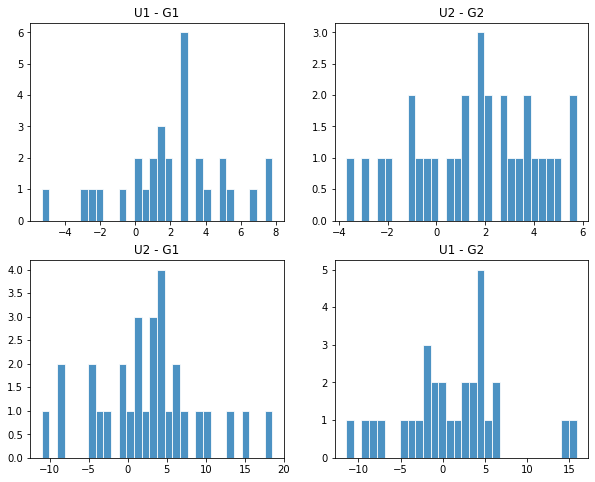

In [116]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax[0][0].hist(first_noun,alpha= 0.8,bins=30,edgecolor='white')
ax[0][0].set_title('U1 - G1')
ax[0][1].hist(second_noun,alpha= 0.8,bins=30,edgecolor='white')
ax[0][1].set_title('U2 - G2')
ax[1][0].hist(first_class,alpha= 0.8,bins=30,edgecolor='white')
ax[1][0].set_title('U2 - G1')
ax[1][1].hist(second_class,alpha= 0.8,bins=30,edgecolor='white')
ax[1][1].set_title('U1 - G2')

Text(0.5, 1.0, 'U1 - G2')

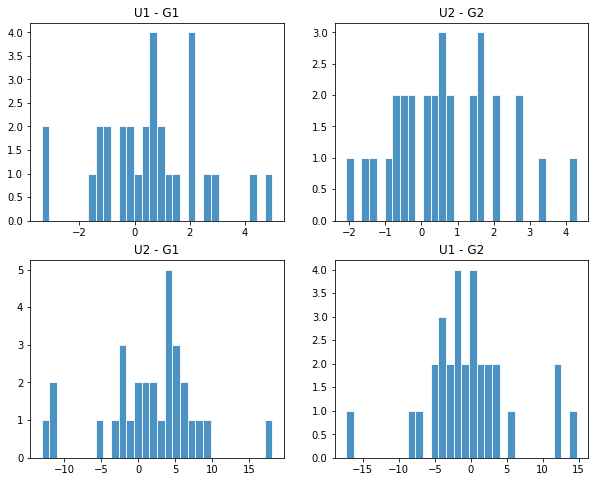

In [132]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax[0][0].hist(first_adj,alpha= 0.8,bins=30,edgecolor='white')
ax[0][0].set_title('U1 - G1')
ax[0][1].hist(second_adj,alpha= 0.8,bins=30,edgecolor='white')
ax[0][1].set_title('U2 - G2')
ax[1][0].hist(first_class,alpha= 0.8,bins=30,edgecolor='white')
ax[1][0].set_title('U2 - G1')
ax[1][1].hist(second_class,alpha= 0.8,bins=30,edgecolor='white')
ax[1][1].set_title('U1 - G2')

In [108]:
sent_none

,0
0,我 很 喜欢 一 位 明星 。
1,我 很 喜欢 一 首 明星 。
2,我 很 喜欢 一 首 歌曲 。
3,我 很 喜欢 一 位 歌曲 。
4,她 开车 去 了 一 家 店 。
...,...
115,他 很 欣赏 一 处 领导 。
116,那里 有 一 支 舰队 。
117,那里 有 一 艘 舰队 。
118,那里 有 一 艘 渔船 。


In [117]:
for i in range(len(first_noun)):
    print(i)
    print('1: ', sent_none.loc[i*4].values[0], round(none_df['G1'].loc[i],3),  '\n2: ', sent_none.loc[1+i*4].values[0], round(none_df['U1'].loc[i],3), '\n3: ',sent_none.loc[2+i*4].values[0], 
          round(none_df['G2'].loc[i],3), '\n4: ',sent_none.loc[3+i*4].values[0], round(none_df['U2'].loc[i],3))
    print('2 - 1: ', round(first_noun[i],3))
    print('4 - 3: ', round(second_noun[i],3))
    print('4 - 1: ', round(first_class[i],3))
    print('2 - 3: ', round(second_class[i],3))
    print('\n')
    

0
1:  我 很 喜欢 一 位 明星 。 16.537 
2:  我 很 喜欢 一 首 明星 。 19.467 
3:  我 很 喜欢 一 首 歌曲 。 16.786 
4:  我 很 喜欢 一 位 歌曲 。 22.33
2 - 1:  2.93
4 - 3:  5.544
4 - 1:  5.793
2 - 3:  2.681


1
1:  她 开车 去 了 一 家 店 。 15.091 
2:  她 开车 去 了 一 座 店 。 16.435 
3:  她 开车 去 了 一 座 山 。 16.965 
4:  她 开车 去 了 一 家 山 。 19.771
2 - 1:  1.344
4 - 3:  2.806
4 - 1:  4.68
2 - 3:  -0.53


2
1:  他 有 一 双 手套 。 23.613 
2:  他 有 一 枚 手套 。 21.409 
3:  他 有 一 枚 纽扣 。 20.831 
4:  他 有 一 双 纽扣 。 22.745
2 - 1:  -2.204
4 - 3:  1.914
4 - 1:  -0.868
2 - 3:  0.577


3
1:  店长 拿 着 一 只 兔子 。 27.169 
2:  店长 拿 着 一 根 兔子 。 30.124 
3:  店长 拿 着 一 根 萝卜 。 31.978 
4:  店长 拿 着 一 只 萝卜 。 28.279
2 - 1:  2.955
4 - 3:  -3.699
4 - 1:  1.11
2 - 3:  -1.854


4
1:  他 认识 了 一 名 男孩 。 19.944 
2:  他 认识 了 一 本 男孩 。 21.831 
3:  他 认识 了 一 本 小说 。 18.34 
4:  他 认识 了 一 名 小说 。 16.347
2 - 1:  1.886
4 - 3:  -1.993
4 - 1:  -3.597
2 - 3:  3.491


5
1:  男人 在 扫描 一 篇 文章 。 10.142 
2:  男人 在 扫描 一 张 文章 。 16.721 
3:  男人 在 扫描 一 张 图片 。 11.829 
4:  男人 在 扫描 一 篇 图片 。 15.218
2 - 1:  6.579
4 - 3:  3.389
4 - 1: 

In [133]:
for i in range(len(first_adj)):
    print(i)
    print('1: ', sent_adj.loc[i*4].values[0], round(adj_df['G1'].loc[i],3),  '\n2: ', sent_adj.loc[1+i*4].values[0], round(adj_df['U1'].loc[i],3), '\n3: ',sent_adj.loc[2+i*4].values[0], 
          round(adj_df['G2'].loc[i],3), '\n4: ',sent_adj.loc[3+i*4].values[0], round(adj_df['U2'].loc[i],3))
    print('2 - 1: ', round(first_adj[i],3))
    print('4 - 3: ', round(second_adj[i],3))
    print('4 - 1: ', round(first_class[i],3))
    print('2 - 3: ', round(second_class[i],3))
    print('\n')

0
1:  我 很 喜欢 一 位 国内 的 明星 。 14.229 
2:  我 很 喜欢 一 首 国内 的 明星 。 14.754 
3:  我 很 喜欢 一 首 国内 的 歌曲 。 20.052 
4:  我 很 喜欢 一 位 国内 的 歌曲 。 21.548
2 - 1:  0.525
4 - 3:  1.496
4 - 1:  7.319
2 - 3:  -5.297


1
1:  她 开车 去 了 一 家 郊外 的 店 。 16.248 
2:  她 开车 去 了 一 座 郊外 的 店 。 16.226 
3:  她 开车 去 了 一 座 郊外 的 山 。 17.669 
4:  她 开车 去 了 一 家 郊外 的 山 。 17.896
2 - 1:  -0.022
4 - 3:  0.227
4 - 1:  1.648
2 - 3:  -1.443


2
1:  他 有 一 双 蓝色 的 手套 。 23.35 
2:  他 有 一 枚 蓝色 的 手套 。 21.792 
3:  他 有 一 枚 蓝色 的 纽扣 。 25.249 
4:  他 有 一 双 蓝色 的 纽扣 。 24.954
2 - 1:  -1.559
4 - 3:  -0.294
4 - 1:  1.604
2 - 3:  -3.457


3
1:  店长 拿 着 一 只 便宜 的 兔子 。 27.101 
2:  店长 拿 着 一 根 便宜 的 兔子 。 26.597 
3:  店长 拿 着 一 根 便宜 的 萝卜 。 26.192 
4:  店长 拿 着 一 只 便宜 的 萝卜 。 28.228
2 - 1:  -0.503
4 - 3:  2.037
4 - 1:  1.128
2 - 3:  0.406


4
1:  他 认识 了 一 名 幸运 的 男孩 。 16.713 
2:  他 认识 了 一 本 幸运 的 男孩 。 18.772 
3:  他 认识 了 一 本 幸运 的 小说 。 13.094 
4:  他 认识 了 一 名 幸运 的 小说 。 11.677
2 - 1:  2.06
4 - 3:  -1.418
4 - 1:  -5.036
2 - 3:  5.678


5
1:  男人 在 扫描 一 篇 很 短 的 文章 。 11.029 
2:  男人 在 